#Importing dependencies and data

Step 1 - Importing the necessary standard libraries for our model which is used for data analysis, visualization, and data splitting.


In [129]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



Output - We now have the necessary libraries.

-numpy which is used for the numerical operations.

-pandas used for data manipuation and anaysis.

-matplotlib.pyplot for creating the static and interactive visualization.

-searborn for statstical visualization based on matplotib.

Step 2 - Mounting the google drive.

In [130]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This allows to access files stored in our google drive.


Step 3 - Load the data from CSV file to the pandas dataframe.

In [131]:
titanic_data = pd.read_csv('/content/drive/MyDrive/uwl/Machine Learning/train (1).csv')


This line reads the titanic dataset from the CSV file which is located in the googledrive and allocates it to the Pandas dataframe named titanic_data.

# Data Analysis

Step 4 - Printing the first five rows of the dataframe.

In [132]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From this, we can analyse the first 5 Column details.

Step 5 - Checking the number of rows and columns.

In [133]:
titanic_data.shape

(891, 12)

Got the total number of rows and columns in the data.

Step 6 - Getting some information about the data.

In [134]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Got the columns datatype and missing values.

Step 7 - Check the number of missing values in each column.

In [135]:
titanic_data.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Checked the number of total null values.

#DATA PREPROCESSING

#Handling missing values

Step 8 - Dropping the cabin column from the dataframe hence the values are too short.

In [136]:
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

Dropped the axis1 which is a column of Cabin from our dataset.

#We have dropped the cabin column now we are going to fill the remaining values of age and embarked column

Step 9 - Replacing the missing values in the age column with mean value.

In [137]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

<ipython-input-137-9bcc38b8c29e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)


Missing values of Age have been filled and saved the data set for further steps by putting inplace=True.

Step 10 - Checking the remaining null values.

In [138]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


We got 2 null values for embarked.

Finding the mode value of embarked column.

In [139]:
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


The mode value of embarked column is S which has the id 0.

Step 11 - Replacing the missing values in embarked column with the mode value.

In [140]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

<ipython-input-140-bc2b444396f9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)


Allocated its mode value to missing embarked values.

Step 12 - Checking if there are any other missing values.

In [141]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Successfully filled the null values in the dataset.

#Feature Engineering

Step 13 - Combining the values in the columns SibSp and Parch

In [142]:
titanic_data['Family'] = titanic_data['SibSp'] + titanic_data['Parch']

In [143]:
titanic_data = titanic_data.drop(['SibSp', 'Parch'], axis=1)

Stored the datas of SibSp and Parch in column called family
This make the model to predict bettter

Step 14 - Getting some statistical measures about the data.

In [144]:
titanic_data.describe()


,PassengerId,Survived,Pclass,Age,Fare,Family
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,32.204208,0.904602
std,257.353842,0.486592,0.836071,13.002015,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,29.699118,14.454200,0.000000
75%,668.500000,1.000000,3.000000,35.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200,10.000000


Describe is a built-in pandas tool in the dataframe it displays the various statistical details in the dataframe.

#Data Visualization

Step 15 - The next step is to call a visualization library.

In [145]:
sns.set()

SNS is a visualization library used to get informative statistical graphics.
set() is a function used for the appearance of the plots here we applied the default seaborn theme.

#Making a count plot for columns
#Countplot is a function that is called from the seaborn library which is used to display the number of observations in the categories for better understanding we put an argument hue which colors each bar differently.


Step 16 - Creating a bar chart that shows the number of survived and non-survived people from the data set.

<Axes: xlabel='Survived', ylabel='count'>

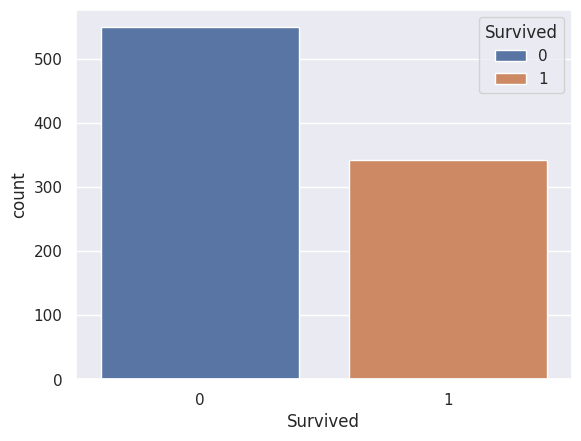

In [146]:
sns.countplot(x='Survived',hue='Survived', data=titanic_data)

Since x and hue are set to the survived  each bar will represent unique numbers with a color separation and here we got details from survived data.

Step 17 - For an exact result we are gonna get the exact numbers of the barplot.

In [147]:
titanic_data['Survived'].value_counts()

,count
Survived,
0,549
1,342


Here we got the exact values of the total number of survived and non-survived people.

Step 18 - Creating a countplot for column sex.

<Axes: xlabel='Sex', ylabel='count'>

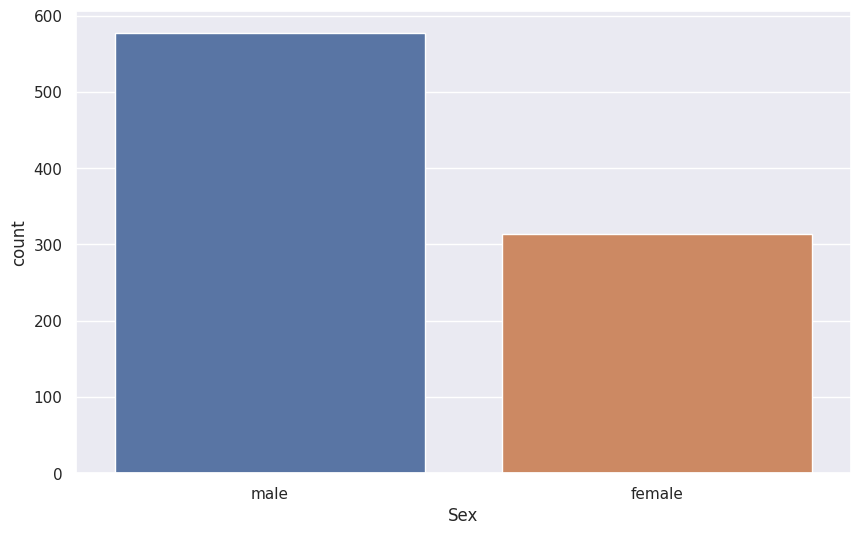

In [148]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Sex', data=titanic_data)


Making a countplot for sex coulumn.

Step 19 - Counting the number of males and females.

In [149]:
titanic_data['Sex'].value_counts()

,count
Sex,
male,577
female,314


Here we counted the exact values and understood that the number of females was less than the number of males.

Step 20 - Analyzing number of survivors by gender wise.

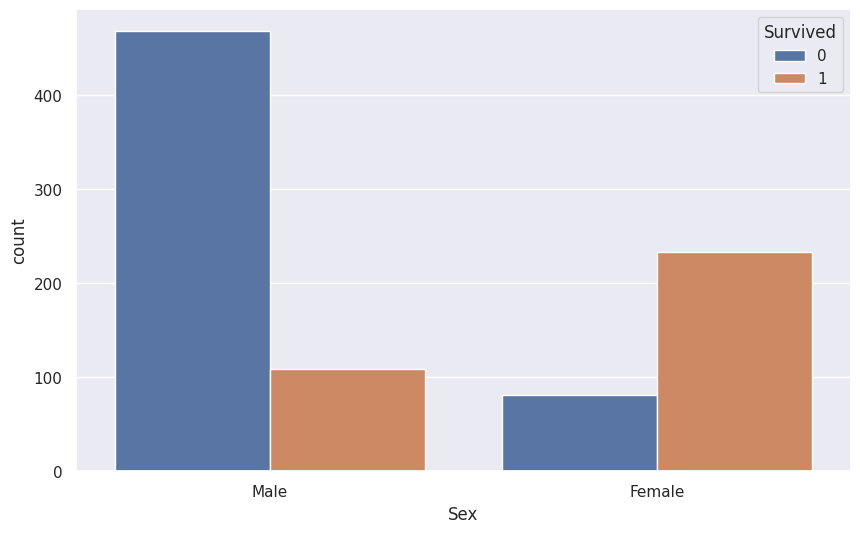

In [150]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Survived', data=titanic_data,)
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

Step 21 - Counting the exact number.

In [151]:
gender_survival = pd.crosstab(titanic_data['Sex'], titanic_data['Survived'])
gender_survival.columns = ['Died', 'Survived']
print(gender_survival)


        Died  Survived
Sex                   
female    81       233
male     468       109


In this output we got the exact number of survived people in each gender we can clearly say females have survived the most.

Step 22 - Making a countplot for pclass coulumn.

<Axes: xlabel='Pclass', ylabel='count'>

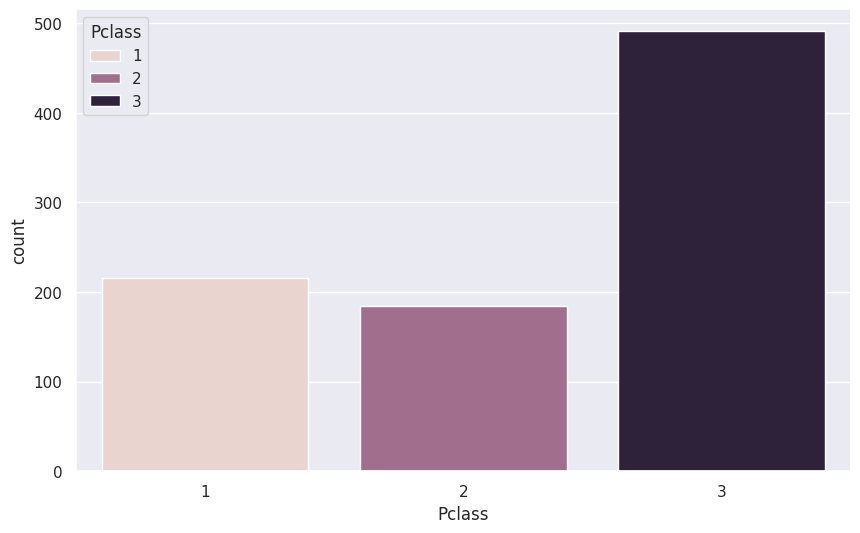

In [152]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Pclass', data=titanic_data)

We got the output as total count of passengers in each class 1,2,3.

Step 23 - Getting the total number of people in each class.

In [153]:
titanic_data['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


From the output we figured the number of passengers in class 3 was highest meanwhile passengers in number 2 is the lowest.

Step 24 - Now we are going to examine how many people have survived in each class.

<Axes: xlabel='Pclass', ylabel='count'>

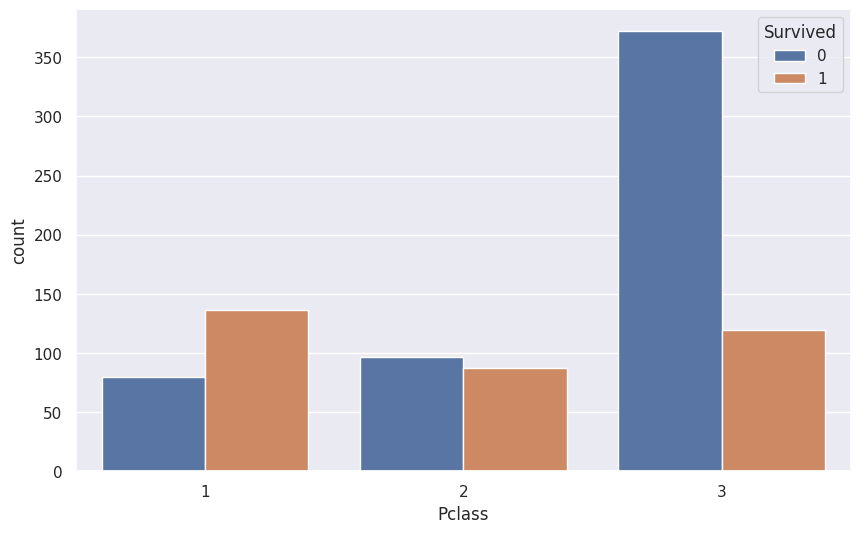

In [154]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)

From this, we can say that survival chances were higher for the upper class compared to the lower class.

Step 25- Checking how many survived in each class

In [155]:
survival_by_class = titanic_data.groupby(['Pclass', 'Survived'])['Survived'].count().reset_index(name='Count')
survival_by_class['Survived/Died'] = survival_by_class['Survived'].map({0: 'Died', 1: 'Survived'})
print(survival_by_class[['Pclass', 'Survived/Died', 'Count']])

   Pclass Survived/Died  Count
0       1          Died     80
1       1      Survived    136
2       2          Died     97
3       2      Survived     87
4       3          Died    372
5       3      Survived    119


From this, we get the exact count of the survival chances in each passenger class.

Step 26 - Checking the number of people who survived in the Pclass data.

<Axes: xlabel='Pclass', ylabel='count'>

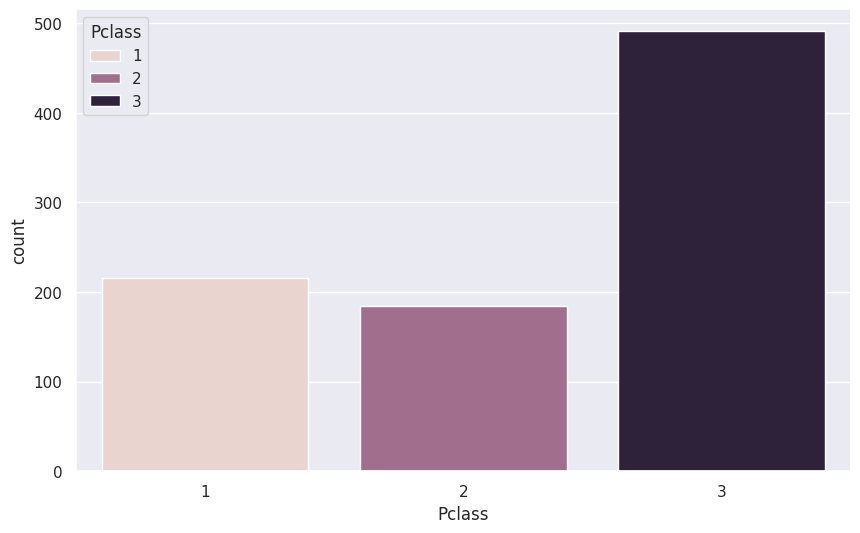

In [156]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Pclass', data=titanic_data)

We got the output as total count of passengers in each class.

Step 27 - In the next step we are going to check the family data.

<Axes: xlabel='Family', ylabel='count'>

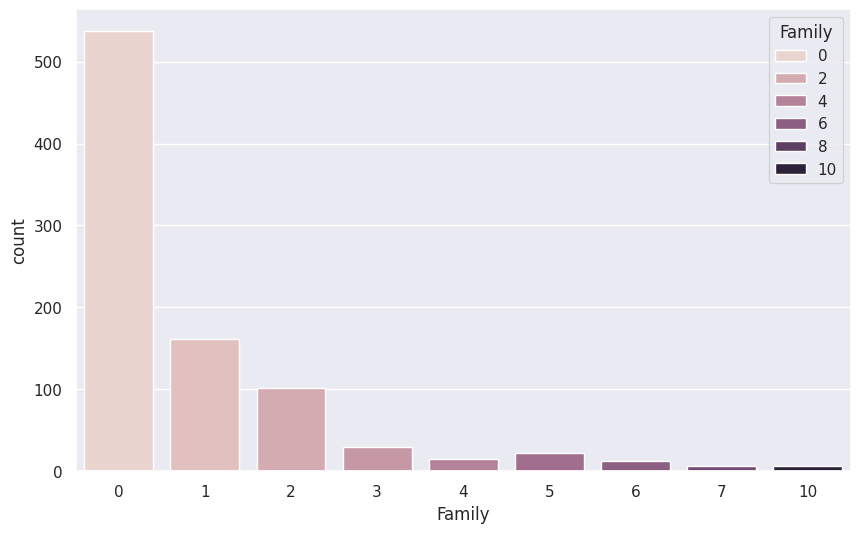

In [157]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Family', hue='Family', data=titanic_data)

We got the output according to the total number of passengers that had family members.

Step 28-checking values in each value

In [158]:
titanic_data['Family'].value_counts()

,count
Family,
0,537
1,161
2,102
3,29
5,22
4,15
6,12
10,7
7,6


In the output above we got the exact number of passengers that had family members.

Step 29 - Here, we are going to check the family size and their survival rate.

<Axes: xlabel='Family', ylabel='count'>

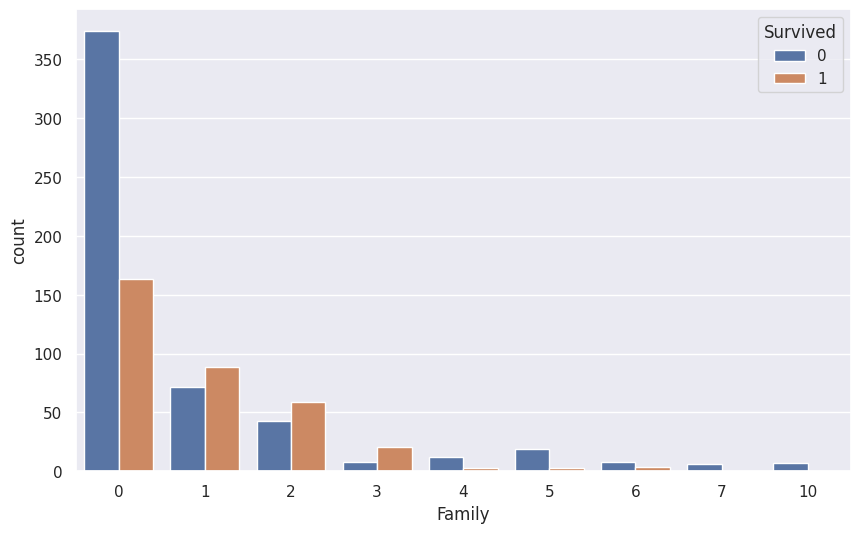

In [159]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Family', hue='Survived', data=titanic_data)

We got the output according to the number of people who had a family and the total count of people who perished and survived.

Step 30 - Checking the exact value

In [160]:
family_survival_counts = titanic_data.groupby(['Family', 'Survived'])['Survived'].count().reset_index(name='Count')
family_survival_counts['Survival Status'] = family_survival_counts['Survived'].map({0: 'Perished', 1: 'Survived'})
print(family_survival_counts[['Family', 'Survival Status', 'Count']])


    Family Survival Status  Count
0        0        Perished    374
1        0        Survived    163
2        1        Perished     72
3        1        Survived     89
4        2        Perished     43
5        2        Survived     59
6        3        Perished      8
7        3        Survived     21
8        4        Perished     12
9        4        Survived      3
10       5        Perished     19
11       5        Survived      3
12       6        Perished      8
13       6        Survived      4
14       7        Perished      6
15      10        Perished      7


In this output above we got the exact number of people that survived or perished according to the number of people who had a family.

Step 31 - In the next code, we are going to check number of passengers in each age group.

In [161]:
titanic_data['Age'].value_counts()

,count
Age,
29.699118,177
24.000000,30
22.000000,27
18.000000,26
28.000000,25
...,...
36.500000,1
55.500000,1
0.920000,1


From this, we can see how many passengers are there in each age group and then display the total count.

Step 32 - In columns Sex and Embarked the values are given as text values we need to convert them to numerical values to make our model more accurate.

In [162]:
titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

<ipython-input-162-7ed75a231ec1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)


Now we converted and stored the numerical values into the column which makes it easier to understand.

Step 33 - Checking if the data is changed and corrected.

In [163]:
titanic_data.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,A/5 21171,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,PC 17599,71.2833,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,STON/O2. 3101282,7.9250,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,113803,53.1000,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,373450,8.0500,0,0
5,6,0,3,"Moran, Mr. James",0,29.699118,330877,8.4583,2,0


The data is successfully changed for our model.

Step 34 - Separating our data set into features and target.

In [164]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Embarked','Survived',],axis=1)
Y = titanic_data['Survived']

We have dropped the unnecessary values and stored the important values to X and assigned the target data which is survived into Y.

Step 35 - Checking the values in X.

In [165]:
print(X)

     Pclass  Sex        Age     Fare  Family
0         3    0  22.000000   7.2500       1
1         1    1  38.000000  71.2833       1
2         3    1  26.000000   7.9250       0
3         1    1  35.000000  53.1000       1
4         3    0  35.000000   8.0500       0
..      ...  ...        ...      ...     ...
886       2    0  27.000000  13.0000       0
887       1    1  19.000000  30.0000       0
888       3    1  29.699118  23.4500       3
889       1    0  26.000000  30.0000       0
890       3    0  32.000000   7.7500       0

[891 rows x 5 columns]


We put the necessary features for our model in X.

Step 36 - Checking values in Y.

In [166]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Stored the target variable in Y.

Step 37 - Splitting our data set into training and testing for our model.

In [167]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

The purpose of this line is to divide dataset into two parts one for training our model and other for testing our model with our trained algorithm.

Step 38 - Checking the number of values in train and test data.

In [168]:
print(X.shape, X_train.shape, X_test.shape)

(891, 5) (712, 5) (179, 5)


From the split we got 20% of data in X_test and remaining 80% in X_train.

#TRAINING MODELS

Step 39 - From skikit-learn library importing classes of our models.

In [169]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score



As a result, the set of code set up the essential tools for building and evaluating our model and from the accuracy score function used to evaluate how well each model predicted.

#MODEL1
# Logistic Regression


Step 40- training logistic regression by the train data

In [170]:
log_reg_model = LogisticRegression(random_state=4)
log_reg_model.fit(X_train, Y_train)
log_reg_train_accuracy = accuracy_score(Y_train, log_reg_model.predict(X_train))
log_reg_test_accuracy = accuracy_score(Y_test, log_reg_model.predict(X_test))

Trained and checked accuracy of train and test data

#MODEL 2
# Random Forest Classifier

Step 41- training random forest by the train data

In [171]:
rf_model = RandomForestClassifier(random_state=4)
rf_model.fit(X_train, Y_train)
rf_train_accuracy = accuracy_score(Y_train, rf_model.predict(X_train))
rf_test_accuracy = accuracy_score(Y_test, rf_model.predict(X_test))


Trained and checked accuracy of train and test data

#MODEL 3
# Support Vector Machine

Step 42- training Support Vector Machine by the train data

In [172]:
svm_model = SVC(random_state=4)
svm_model.fit(X_train, Y_train)
svm_train_accuracy = accuracy_score(Y_train, svm_model.predict(X_train))
svm_test_accuracy = accuracy_score(Y_test, svm_model.predict(X_test))


Trained and checked accuracy of train and test data

Step 43 - Compare Accuracy from models.

Step 44- Getiing the accuracy score of models

In [173]:

results = pd.DataFrame({
    'Algorithm': ['Logistic Regression', 'Random Forest', 'SVM'],
    'Training Accuracy': [log_reg_train_accuracy, rf_train_accuracy, svm_train_accuracy ],
    'Test Accuracy': [log_reg_test_accuracy, rf_test_accuracy, svm_test_accuracy]
})

print(results)


             Algorithm  Training Accuracy  Test Accuracy
0  Logistic Regression           0.817416       0.765363
1        Random Forest           0.984551       0.793296
2                  SVM           0.683989       0.642458


Got the accuracy score of each data
From these random forest shows the most accuracy

Step 45 - Display results as a bar chart.

<Axes: title={'center': 'Model Comparison: Training vs Test Accuracy'}, xlabel='Algorithm', ylabel='Accuracy'>

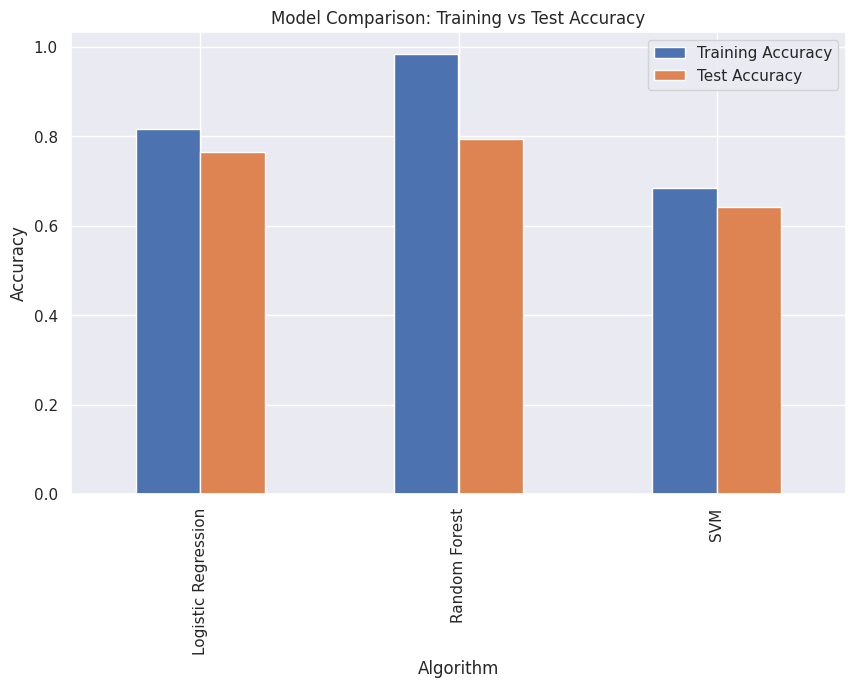

In [174]:
results.set_index('Algorithm').plot(kind='bar', figsize=(10,6),

                                    title='Model Comparison: Training vs Test Accuracy',
                                   ylabel='Accuracy', xlabel='Algorithm')

The above bar graph displays the training and test accuracies of each model.

Step 46 - From the 3 models we got the most accuracy for Random Forest so we are going to train the model separately.

#TRAINING THE BEST MODEL


In [175]:
# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=4)
rf_model.fit(X_train, Y_train)

# Make predictions on the test data
Prediction = rf_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(Y_test, Prediction)
print('Accuracy score of test data : ', accuracy)



# Display the predictions
print("\nPredictions on test data:")
print(Prediction)

Accuracy score of test data :  0.7932960893854749

Predictions on test data:
[1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1
 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0
 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1
 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0
 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1]


 In the output above it shows the predictions.

Step 47 - We got the test data accuracy now printing how many survived and perished according to the model.

<ipython-input-176-f26c67efd216>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Perished', 'Survived'])


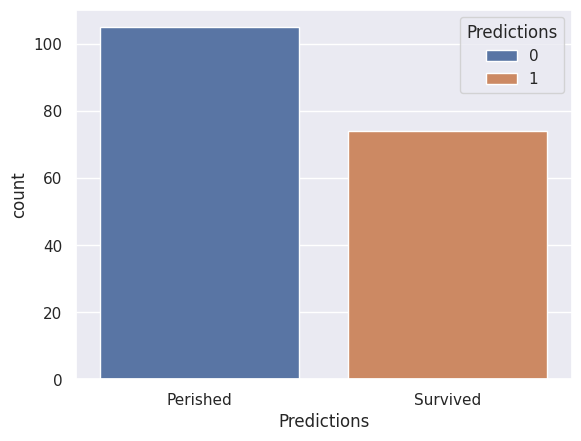

In [176]:
X_test['Predictions'] = Prediction
ax = sns.countplot(x='Predictions', hue='Predictions', data=X_test)

ax.set_xticklabels(['Perished', 'Survived'])
plt.show()


In the above bar graph, we can see the predicted graph of passengers who perished and survived.



Step 48 - Counting the exact number of details.

In [177]:

X_test['Predictions'].value_counts()
prediction_counts = X_test['Predictions'].value_counts().rename(index={0: 'Perished', 1: 'Survived'})
print(prediction_counts)

Predictions
Perished    105
Survived     74
Name: count, dtype: int64


In the above output, We got the exact amount of the predictions of passengers who perished and survived.

Step 49- Importing the test file from drive

In [178]:
Z_test = pd.read_csv('/content/drive/MyDrive/uwl/Machine Learning/test (1).csv')

stored the CSV file in Z_test

Step 50-Importing the gender submission file drive

In [179]:
G_test = pd.read_csv('/content/drive/MyDrive/uwl/Machine Learning/gender_submission.csv')

Stored the CSV file in G_test

Step 51- Examining the values in Z_test

In [180]:
Z_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Z_test has the features almost same as our train data except the survival data

Step 52-Examining the datas in the G_test

In [181]:
G_test.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


G_test contains the Survival column

Step 53- COunting t he total non null values in the Z_test column

In [182]:
Z_test.notnull().sum()

,0
PassengerId,418
Pclass,418
Name,418
Sex,418
Age,332
SibSp,418
Parch,418
Ticket,418
Fare,417
Cabin,91


In Z_test features such as Cabin, Fare, Age has some missing values

Step 54- Finding out how many miisng values are there

In [183]:
Z_test.isnull().sum()


,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In this column Age and Fare have a little amount of missing values which can be replaced by its mean and mode meanwhile column cabin contains lareg amount of miising data which cannot be replicated.

Step 55-Assuming the same preprocessing steps as before

In [184]:
Z_test = Z_test.drop(columns=['Cabin', 'Embarked'], axis=1)
Z_test['Age'].fillna(Z_test['Age'].mean(), inplace=True)
Z_test['Fare'].fillna(Z_test['Fare'].mode()[0], inplace=True)
Z_test = Z_test.drop(columns = ['PassengerId','Name','Ticket'],axis=1)


<ipython-input-184-f26c2567ac98>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Z_test['Age'].fillna(Z_test['Age'].mean(), inplace=True)
<ipython-input-184-f26c2567ac98>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

Filled the Age and Fare column with its mean and mode value and dropped the unnecesary columns

Step 56-Coverting the Strings to numerical values of column sex

In [191]:
Z_test.replace({'Sex':{'male':0,'female':1}}, inplace=True)

The Z_test data now have the Sex column value as numerical values

Step 57-Storing the SibSp and Parch data into Family and dropping the values

In [186]:
Z_test['Family'] = Z_test['SibSp'] + Z_test['Parch']
Z_test = Z_test.drop(['SibSp', 'Parch'], axis=1)

Now the Family column contains the combined value of SibSp and Parch

Step 58-Cheching the sum of null values

In [187]:
Z_test.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
Fare,0
Family,0


Hence there is no null values in our data it is ready for the prediction

#Testing the new data

Step 59-  Predict on Z_test using each model

In [192]:
log_reg_predictions = log_reg_model.predict(Z_test)
rf_predictions = rf_model.predict(Z_test)
svm_predictions = svm_model.predict(Z_test)


From these lines trained models predict the outcomes

Step 60-Get the actual survival outcomes from G_test

In [195]:
actual_outcomes = G_test['Survived']

This line exposes the actual outcome from test data and stores it in actual_outcome variable to use it to evaluate how well the prediction went

Step 61- Calculate accuracy for each model

In [196]:
log_reg_accuracy = accuracy_score(actual_outcomes, log_reg_predictions)
rf_accuracy = accuracy_score(actual_outcomes, rf_predictions)
svm_accuracy = accuracy_score(actual_outcomes, svm_predictions)

Each line compares the predictions of the model with the actual outcomes and stores it into a corresponding new variable

Step 62- Print the accuracies

In [197]:
print(f"Logistic Regression Accuracy: {log_reg_accuracy}")
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"SVM Accuracy: {svm_accuracy}")

Logistic Regression Accuracy: 0.9425837320574163
Random Forest Accuracy: 0.8397129186602871
SVM Accuracy: 0.65311004784689


We got the final outcomes from each model.In this comparison Logistic Regression model was more accurate tahn the other two

////The accuuracy of two test are differ from each other because of reasons like Data differneces, Model Overfitting, and Randomness in Machine Learning